<img src="./logo_UTN.svg" align="right" width="150" />

#### Procesamiento Digital de Señales
# TS7: Estimación Espectral
#### Eloy Silva

### Configuración e inicio de la simulación

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as sio

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,7)

import warnings
warnings.filterwarnings('ignore')

def vertical_flaten(a):

    return a.reshape(a.shape[0],1)

### Lectura de Electrocardiograma (ECG). Estimación de espectro y ancho de banda mediante Periodograma y método Welch.

Ancho de banda a al 99.0% partir de Periodograma: 29.200000000000003
Ancho de banda a al 99.0% partir de Welch: 31.0


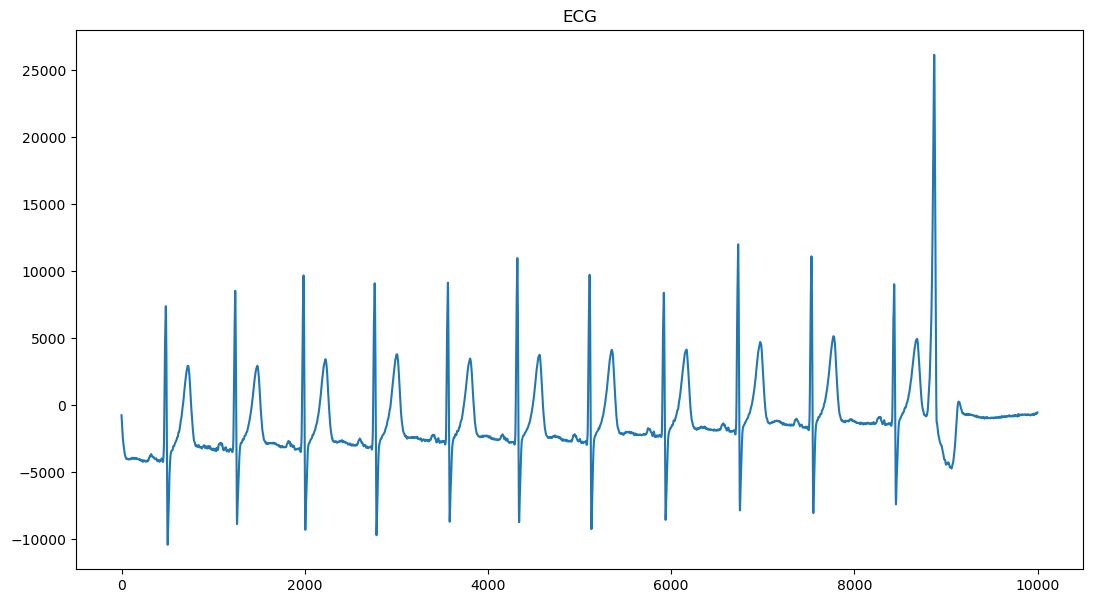

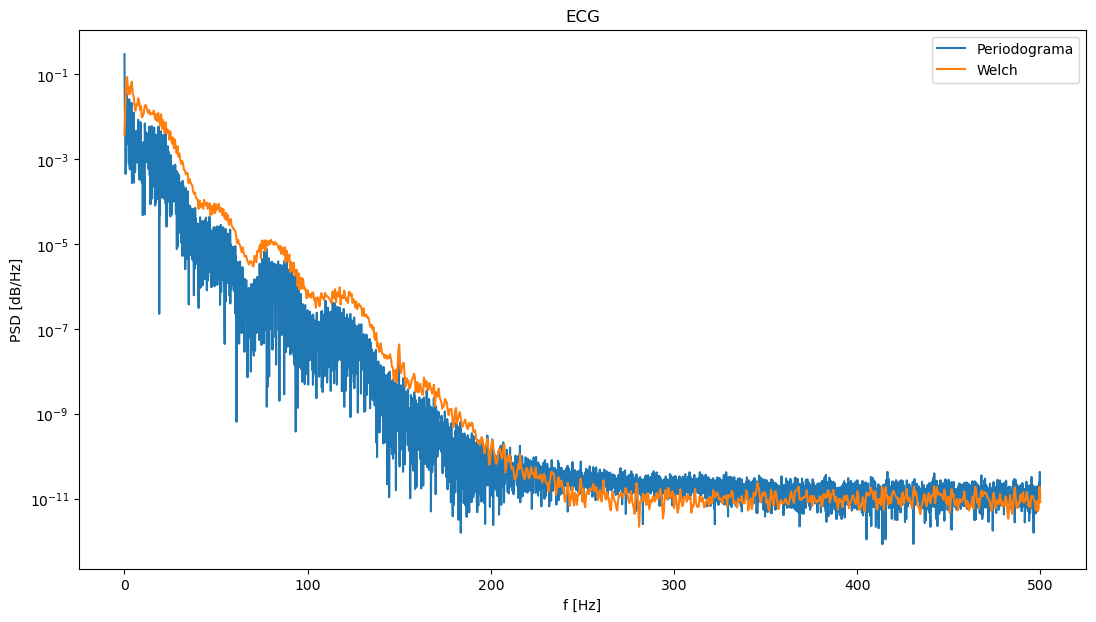

In [7]:
fs = 1000 # Hz
mat_struct = sio.loadmat('ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
ecg_one_lead = ecg_one_lead[0:10000]
N = len(ecg_one_lead)

plt.figure()
plt.plot(ecg_one_lead)
plt.title('ECG')

spectrum = np.fft.fft(ecg_one_lead, axis=0)/N
f = np.fft.fftfreq(N, 1/fs)
periodogram = fs*(np.abs(spectrum)**2)
freq, welch = sp.signal.welch(ecg_one_lead, fs=fs, nperseg=N/5, axis=0)

Pperio = np.sum(periodogram[:N//2])
periodogram = periodogram[:N//2]/Pperio
Paccum_perio = np.cumsum(periodogram)
thresh = 0.99
index = np.where(Paccum_perio >= thresh)[0][0]
pos_f = f[:N//2]
Bw = pos_f[index]
print('Ancho de banda a al ' + str(thresh*100) + '% partir de Periodograma: ' + str(Bw))

Pwelch = np.sum(welch)
welch = welch/Pwelch
Paccum_welch = np.cumsum(welch)
thresh = 0.99
index = np.where(Paccum_welch >= thresh)[0][0]
Bw = freq[index]
print('Ancho de banda a al ' + str(thresh*100) + '% partir de Welch: ' + str(Bw))

plt.figure();
plt.semilogy(pos_f, periodogram, label='Periodograma')
plt.semilogy(freq, welch, label='Welch')
plt.title('ECG')
plt.xlabel('f [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()

### Lectura de Pletismografía (PPG). Estimación de espectro mediante Periodograma y método Welch.

Ancho de banda a al 99.0% partir de Periodograma: 0.008826320086497938
Ancho de banda a al 99.0% partir de Welch: 3.8397881496193316


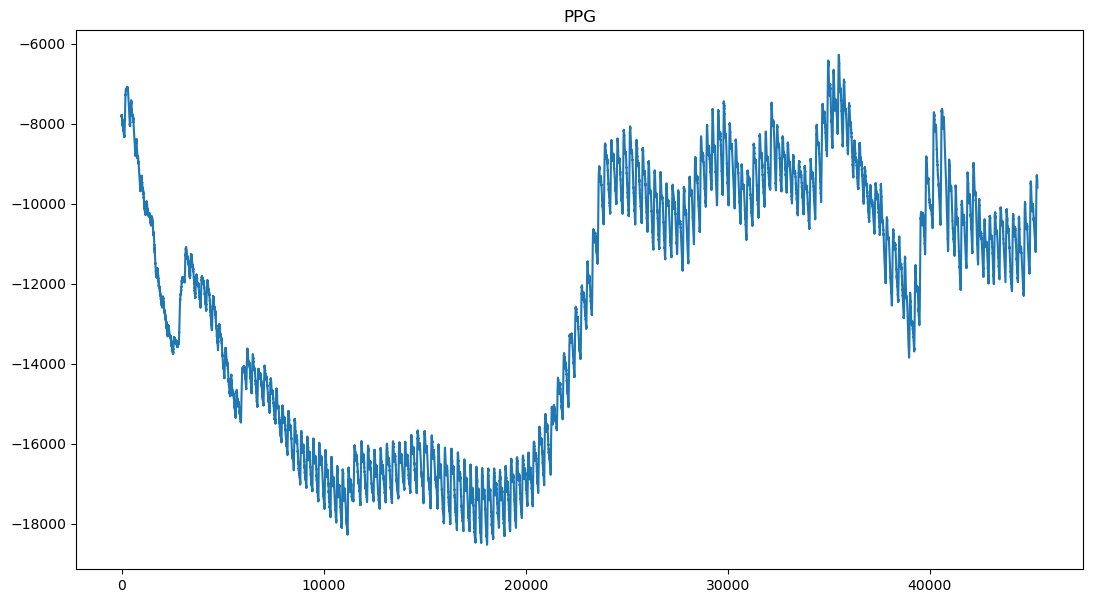

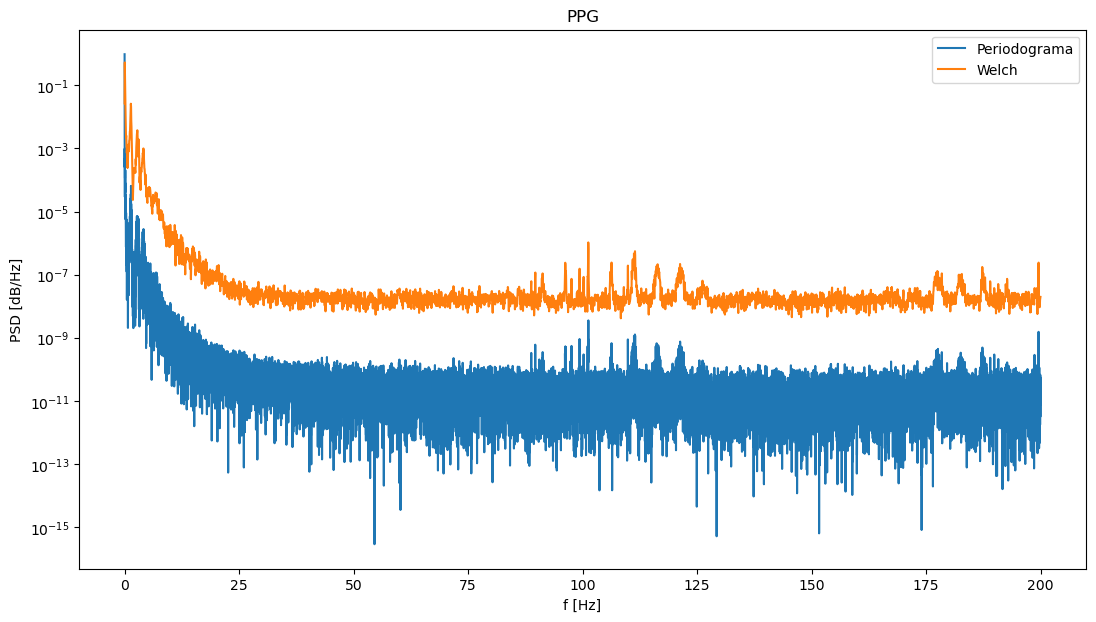

In [8]:
fs = 400 # Hz
ppg = np.genfromtxt('PPG.csv', delimiter=',', skip_header=1)  # Omitir la cabecera si existe
N = len(ppg)

plt.figure()
plt.plot(ppg)
plt.title('PPG')

spectrum = np.fft.fft(ppg, axis=0)/N
f = np.fft.fftfreq(N, 1/fs)
periodogram = fs*(np.abs(spectrum)**2)
freq, welch = sp.signal.welch(ppg, fs=fs, nperseg=N/5, axis=0)

Pperio = np.sum(periodogram[:N//2])
periodogram = periodogram[:N//2]/Pperio
Paccum_perio = np.cumsum(periodogram)
thresh = 0.99
index = np.where(Paccum_perio >= thresh)[0][0]
pos_f = f[:N//2]
Bw = pos_f[index]
print('Ancho de banda a al ' + str(thresh*100) + '% partir de Periodograma: ' + str(Bw))

Pwelch = np.sum(welch)
welch = welch/Pwelch
Paccum_welch = np.cumsum(welch)
thresh = 0.99
index = np.where(Paccum_welch >= thresh)[0][0]
Bw = freq[index]
print('Ancho de banda a al ' + str(thresh*100) + '% partir de Welch: ' + str(Bw))

plt.figure();
plt.semilogy(pos_f, periodogram, label='Periodograma')
plt.semilogy(freq, welch, label='Welch')
plt.title('PPG')
plt.xlabel('f [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()

### Lectura de archivo de audio (WAV). Estimación de espectro mediante Periodograma y método Welch.

Ancho de banda a al 99.0% partir de Periodograma: 6643.666666666666
Ancho de banda a al 99.0% partir de Welch: 6655.0


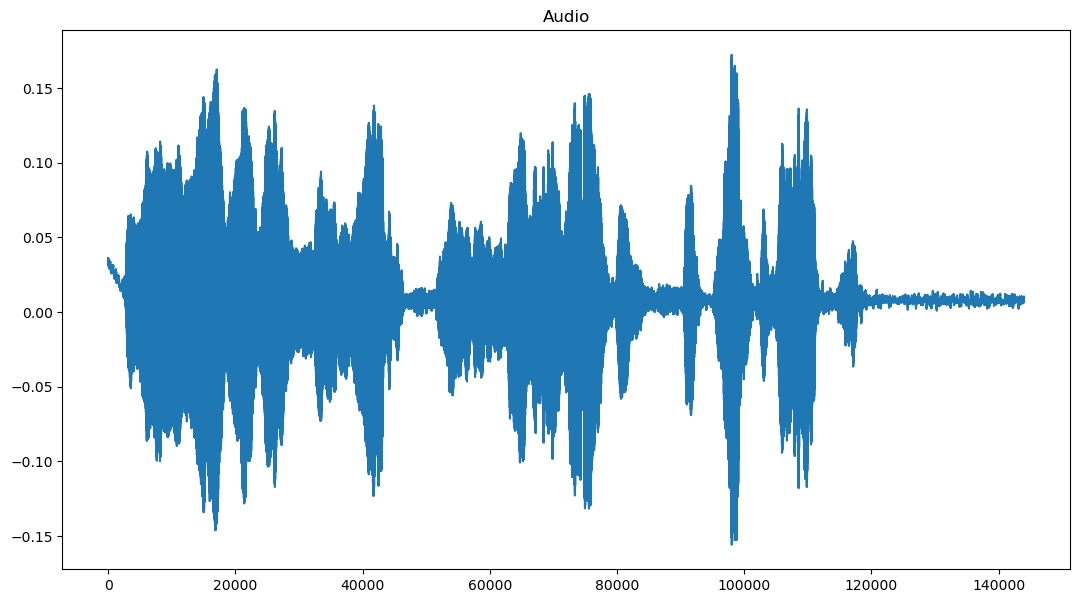

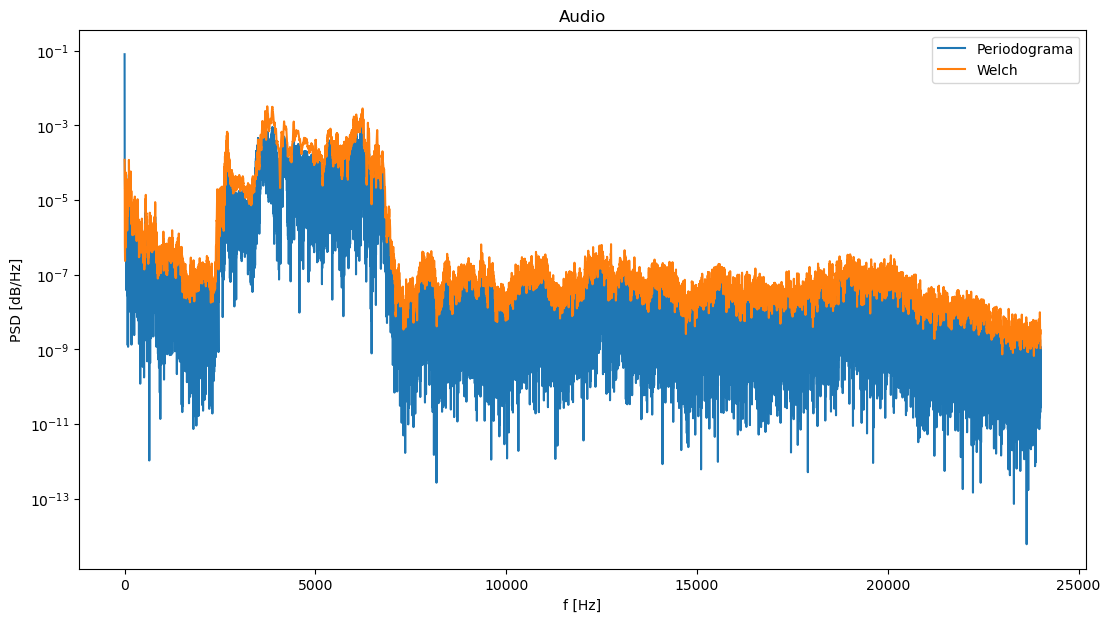

In [9]:
fs, wav_data = sio.wavfile.read('silbido.wav')
N = len(wav_data)

plt.figure()
plt.plot(wav_data)
plt.title('Audio')

spectrum = np.fft.fft(wav_data, axis=0)/N
f = np.fft.fftfreq(N, 1/fs)
periodogram = fs*(np.abs(spectrum)**2)
freq, welch = sp.signal.welch(wav_data, fs=fs, nperseg=N/5, axis=0)

Pperio = np.sum(periodogram[:N//2])
periodogram = periodogram[:N//2]/Pperio
Paccum_perio = np.cumsum(periodogram)
thresh = 0.99
index = np.where(Paccum_perio >= thresh)[0][0]
pos_f = f[:N//2]
Bw = pos_f[index]
print('Ancho de banda a al ' + str(thresh*100) + '% partir de Periodograma: ' + str(Bw))

Pwelch = np.sum(welch)
welch = welch/Pwelch
Paccum_welch = np.cumsum(welch)
thresh = 0.99
index = np.where(Paccum_welch >= thresh)[0][0]
Bw = freq[index]
print('Ancho de banda a al ' + str(thresh*100) + '% partir de Welch: ' + str(Bw))

plt.figure();
plt.semilogy(pos_f, periodogram, label='Periodograma')
plt.semilogy(freq, welch, label='Welch')
plt.title('Audio')
plt.xlabel('f [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()

### Se observa que tanto el periodograma como el método de Welch dan un resultado similar. El ancho de banda del PPG calculado no es correcto ya que es una señal que posee mucho ruido.